In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import h5py

PATH = "cmumosei_labels/CMU_MOSEI_Labels.hdf"

In [2]:
f = h5py.File(PATH, "r")

In [3]:
labels = {}

for filename in f["All Labels"]["data"].keys():
    labels[filename] = f["All Labels"]["data"][filename]["features"][:]
    

In [4]:
labels = {}

for filename in f["All Labels"]["data"].keys():
    print(f["All Labels"]["data"][filename]["intervals"][:])
    break

[[23.199 30.325]]


In [5]:
from dataclasses import make_dataclass


Record  = make_dataclass("Record", [("video_id", str),
                                        ("begin", float),
                                        ("end", float),
                                        ("sentiment", float),
                                        ("happy", float),
                                        ("sad", float),
                                        ("anger", float),
                                        ("surprise", float),
                                        ("disgust", float),
                                        ("fear", float)]
                                        )
records = []
for filename in f["All Labels"]["data"].keys():
    intervals = f["All Labels"]["data"][filename]["intervals"][:]
    labels = f["All Labels"]["data"][filename]["features"][:]
    for interval, label in zip(intervals, labels):
        args = [filename] + list(interval) + list(label)
        records.append(Record(*args))

In [6]:
import pandas as pd

df = pd.DataFrame(records)
df["duration"] = df["end"] - df["begin"]
df["max_emotion"] = df[["happy", "sad", "anger", "surprise", "disgust", "fear"]].idxmax(axis=1)
df

,video_id,begin,end,sentiment,happy,sad,anger,surprise,disgust,fear,duration,max_emotion
0,--qXJuDtHPw,23.199,30.325,1.000000,0.666667,0.000000,0.0,0.0,0.0,0.000000,7.126,happy
1,-3g5yACwYnA,82.753,100.555,1.000000,0.666667,0.666667,0.0,0.0,0.0,0.666667,17.802,happy
2,-3g5yACwYnA,119.919,125.299,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.000000,5.380,happy
3,-3g5yACwYnA,4.840,14.052,0.000000,0.666667,0.666667,0.0,0.0,0.0,0.333333,9.212,happy
4,-3g5yACwYnA,13.211,27.521,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.000000,14.310,happy
...,...,...,...,...,...,...,...,...,...,...,...,...
23254,zwTrXwi54us,47.444,49.312,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.868,happy
23255,zwTrXwi54us,48.511,53.652,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,5.141,happy
23256,zwTrXwi54us,52.652,57.942,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,5.290,happy
23257,zwTrXwi54us,57.980,69.326,0.666667,0.333333,0.000000,0.0,0.0,0.0,0.000000,11.346,happy


In [7]:
df.describe()

,begin,end,sentiment,happy,sad,anger,surprise,disgust,fear,duration
count,23259.000000,23259.000000,23259.000000,23259.000000,23259.000000,23259.000000,23259.000000,23259.000000,23259.000000,23259.000000
mean,49.402565,57.007279,0.151554,0.480001,0.157287,0.155725,0.047881,0.119495,0.040981,7.604714
std,45.334759,45.614323,1.111520,0.629221,0.324369,0.362210,0.168202,0.319611,0.152526,5.044470
min,-0.487528,0.572000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119728
25%,15.127000,22.822000,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.402000
50%,37.526000,45.301000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,6.467574
75%,70.327000,78.306000,1.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,9.421000
max,264.191000,272.644000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.666667,109.393651


In [8]:
df_red = df[["happy", "sad", "anger", "surprise", "disgust", "fear"]]

In [9]:
from scipy.stats import entropy

df_norm = df_red.div(df_red.sum(axis=1), axis=0)
values = df[["happy", "sad", "anger", "surprise", "disgust", "fear"]]
df_norm["entropy"] = entropy(values, axis=1)
df_norm

/home/amosbrazzoli/.local/share/virtualenvs/CMU-MultimodalSDK-GOYrgKsa/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2751: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


,happy,sad,anger,surprise,disgust,fear,entropy
0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.333333,0.333333,0.0,0.0,0.0,0.333333,1.098612
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.400000,0.400000,0.0,0.0,0.0,0.200000,1.054920
4,0.500000,0.500000,0.0,0.0,0.0,0.000000,0.693147
...,...,...,...,...,...,...,...
23254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23256,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
23257,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


## Entropy distribution of row-normalised emotions

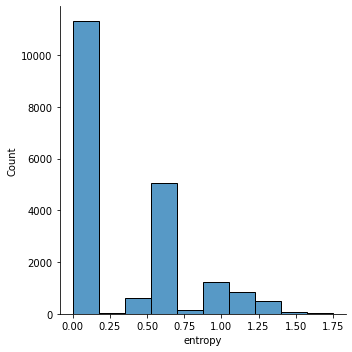

In [10]:
sns.displot(df_norm, x="entropy", bins=10)

## Sentiment Distribution

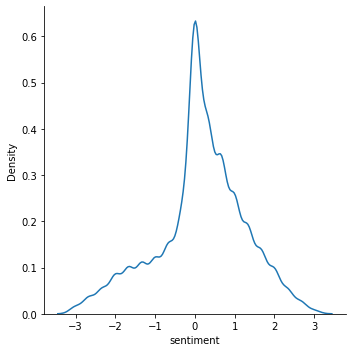

In [11]:
sns.displot(df, x="sentiment", kind="kde")

## Sentiment Emotion Distribution

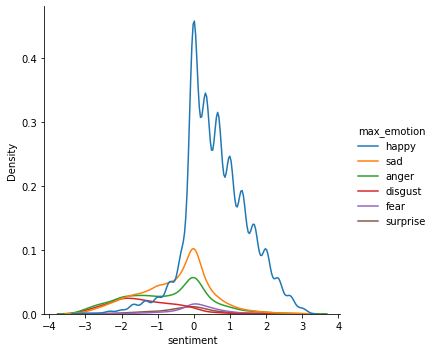

In [12]:
sns.displot(df, x="sentiment", hue='max_emotion', kind="kde")

## Row-maximum emotion stats

/home/amosbrazzoli/.local/share/virtualenvs/CMU-MultimodalSDK-GOYrgKsa/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_emotion', ylabel='count'>

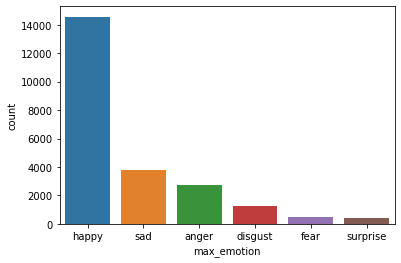

In [13]:
sns.countplot(df["max_emotion"])

In [14]:
df_normalised = df
df_normalised[["happy", "sad", "anger", "surprise", "disgust", "fear"]] = df_norm[["happy", "sad", "anger", "surprise", "disgust", "fear"]]
df_normalised['entropy'] = df_norm["entropy"]
df_normalised

,video_id,begin,end,sentiment,happy,sad,anger,surprise,disgust,fear,duration,max_emotion,entropy
0,--qXJuDtHPw,23.199,30.325,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,7.126,happy,0.000000
1,-3g5yACwYnA,82.753,100.555,1.000000,0.333333,0.333333,0.0,0.0,0.0,0.333333,17.802,happy,1.098612
2,-3g5yACwYnA,119.919,125.299,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,5.380,happy,NaN
3,-3g5yACwYnA,4.840,14.052,0.000000,0.400000,0.400000,0.0,0.0,0.0,0.200000,9.212,happy,1.054920
4,-3g5yACwYnA,13.211,27.521,0.000000,0.500000,0.500000,0.0,0.0,0.0,0.000000,14.310,happy,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23254,zwTrXwi54us,47.444,49.312,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.868,happy,NaN
23255,zwTrXwi54us,48.511,53.652,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.141,happy,NaN
23256,zwTrXwi54us,52.652,57.942,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,5.290,happy,0.000000
23257,zwTrXwi54us,57.980,69.326,0.666667,1.000000,0.000000,0.0,0.0,0.0,0.000000,11.346,happy,0.000000


In [15]:
df.to_csv("reworked/labels.csv")
df_normalised.to_csv("reworked/labels_normalised.csv")

In [16]:
df.describe()

,begin,end,sentiment,happy,sad,anger,surprise,disgust,fear,duration,entropy
count,23259.000000,23259.000000,23259.000000,19773.000000,19773.000000,19773.000000,19773.000000,19773.000000,19773.000000,23259.000000,19773.000000
mean,49.402565,57.007279,0.151554,0.511425,0.175489,0.137091,0.042222,0.092555,0.041218,7.604714,0.333656
std,45.334759,45.614323,1.111520,0.448191,0.314403,0.274598,0.140532,0.211215,0.149359,5.044470,0.417229
min,-0.487528,0.572000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119728,0.000000
25%,15.127000,22.822000,-0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.402000,0.000000
50%,37.526000,45.301000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.467574,0.000000
75%,70.327000,78.306000,1.000000,1.000000,0.250000,0.125000,0.000000,0.000000,0.000000,9.421000,0.673012
max,264.191000,272.644000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,109.393651,1.747868


### Explorative Regression Emotions -> Sentiment

In [17]:
from sklearn import linear_model
import statsmodels.api as sm

df =df.fillna(0)
X = df[["happy", "sad", "anger", "surprise", "disgust", "fear"]]
w = df["duration"]
Y = df["sentiment"]

regr = linear_model.LinearRegression()
regr.fit(X, Y, sample_weight=w)

#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X, weight=w).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3298.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:32:42   Log-Likelihood:                -28301.
No. Observations:               23259   AIC:                         5.662e+04
Df Residuals:                   23252   BIC:                         5.667e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0927      0.014      6.699      0.0

Label Structure

Vector of 7 floats: emotions + sentiment

["sentiment", "happy", "sad", "anger", "surprise", "disgust", "fear"]

In [18]:
for key in f["All Labels"]["metadata"].keys():
    print(key,"\t", f["All Labels"]["metadata"][key][0])

alignment compatible 	 b'true'
computational sequence description 	 b'"Labels for CMU-MOSEI Dataset"'
computational sequence version 	 b'1.0'
contact 	 b'"abagherz@andrew.cmu.edu"'
creator 	 b'"Amir Zadeh"'
dataset bib citation 	 b'"@inproceedings{cmumoseiacl2018, title={Multimodal Language Analysis in the Wild: {CMU-MOSEI} Dataset and Interpretable Dynamic Fusion Graph}, author={Zadeh, Amir and Liang, Paul Pu and Vanbriesen, Jon and Poria, Soujanya and Cambria, Erik and Chen, Minghai and Morency, Louis-Philippe},booktitle={Association for Computational Linguistics (ACL)},year={2018}}"'
dataset name 	 b'"CMU-MOSEI"'
dataset version 	 b'1.0'
dimension names 	 b'["sentiment", "happy", "sad", "anger", "surprise", "disgust", "fear"]'
featureset bib citation 	 b'"@online{amt, author = {Amazon},title = {Amazon Mechanical Turk},year = {2017},url = {https://www.mturk.com}}"'
md5 	 b'null'
root name 	 b'"All Labels"'
uuid 	 b'"bbce9ca9-e556-46f4-823e-7c5e0147afab"'
